# Mary McDonagh
# Programming for Data Analysis
# Analysis of a real world phenomenom

### Table of Contents
- 1.0 Investigation
- 2.0 Assignment Questions:
- 2.1 Choose a real world phenomenon to collect at least one-hundred data points across at least four different variables.
- 2.2 Investigate the types of variables involved, their likely distributions and their relationships with each other.
- 2.3 Sumulate a data set matching their properties as closely as possible.
- 3.0 Summary
- 4.0 References

## 1.0 Investigation
I have chosen to review data of world econometric factors in order to analyse the associations between the world GDP per capita, life expectancy, population, birth rate and neo natal mortality rate. This project is based on a pre existing dataset taken from the world databank indicators portal. The datset is called nations.csv.

## 2.0 Assignment Questions

### 2.1: Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables

#### Overview of the existing Dataset.

Five variables have been taken into consideration:
- gdp_percap
- life_expect
- population
- birth_rate
- Neo natal Mortal Rate.

To begin I will study the existing dataset to understand the different attributes, their relations with each other and the distribution they follow. Using these observations I will form an algorithym for a manual data sythesis.

In [21]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [72]:
import os
os.getcwd()

'C:\\Users\\sam2\\real world phenomenon'

In [73]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'nations.csv',
 'obsolete',
 'real world phenomenom.ipynb',
 'Updated project']

In [22]:
# Reading the csv file with the pre-defined data
# Sort the year into a list and print the output
import pandas as pd
predefined_data = pd.read_csv("nations.csv")
print(list(predefined_data))
year=sorted(predefined_data['year'].tolist())
print(Counter(year))
print(" Number of Rows by Columns", predefined_data.shape)

['iso2c', 'iso3c', 'country', 'year', 'gdp_percap', 'life_expect', 'population', 'birth_rate', 'neonat_mortal_rate', 'region', 'income']
Counter({1990: 211, 1991: 211, 1992: 211, 1993: 211, 1994: 211, 1995: 211, 1996: 211, 1997: 211, 1998: 211, 1999: 211, 2000: 211, 2001: 211, 2002: 211, 2003: 211, 2004: 211, 2005: 211, 2006: 211, 2007: 211, 2008: 211, 2009: 211, 2010: 211, 2011: 211, 2012: 211, 2013: 211, 2014: 211})
 Number of Rows by Columns (5275, 11)


In [10]:
# Read the raw csv file from my github
# Use .head to show the headings
df_nations = pd.read_csv('https://raw.githubusercontent.com/shakti230/real-world-phenomenon/master/nations.csv?token=AikNlzQzU6s3d94PO8-7A50mv6Ij-CDbks5cGYL6wA%3D%3D')      
df_nations.head()

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,1996,NaN,NaN,64291.0,10.9,2.8,Europe & Central Asia,High income
1,AD,AND,Andorra,1994,NaN,NaN,62707.0,10.9,3.2,Europe & Central Asia,High income
2,AD,AND,Andorra,2003,NaN,NaN,74783.0,10.3,2.0,Europe & Central Asia,High income
3,AD,AND,Andorra,1990,NaN,NaN,54511.0,11.9,4.3,Europe & Central Asia,High income
4,AD,AND,Andorra,2009,NaN,NaN,85474.0,9.9,1.7,Europe & Central Asia,High income


### 2.2 Investigate the types of variables involved, their likely distributions and their relationships with each other.


#### Subsetting values
The dataset has 5275 rows of data gathered over a period of 24 years starting from 1990 to 2014. Each year has 211 data point. We subset the data where the year is equal to 2000. I will use this as a reference for the project. The rows containing NA values have been removed and the columns which are not necessary are not included.


In [11]:
# Extracting the data from the year 2000
# predefined_data = predefined_data[predefined_data['Year'] == 2000]
# remove any rows containing na
# remove columns which will not be analysed in this project e.g. iso2c, iso3c
predefined_data_2000=predefined_data.loc[predefined_data['year'] == 2000].dropna().drop(columns=['iso2c', 'iso3c'])
predefined_data_2000.head()

,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
34,United Arab Emirates,2000,84974.894090,74.451537,3050128.0,16.399,5.6,Middle East & North Africa,High income
80,Antigua and Barbuda,2000,15312.566500,73.397293,77648.0,20.240,9.4,Latin America & Caribbean,Upper middle income
119,Albania,2000,4045.752069,74.271537,3089027.0,16.401,11.3,Europe & Central Asia,Upper middle income
139,Armenia,2000,2313.331946,71.276585,3076098.0,13.203,15.9,Europe & Central Asia,Lower middle income
161,Angola,2000,3036.559728,45.204780,15058638.0,51.009,58.4,Sub-Saharan Africa,Lower middle income


#### Exploratory Analysis
Using the describe() function I can display the statistical facts of the data as shown below such as min, max, mean and standard deviation.

In [12]:
#Exploratory analysis of the different variables.
predefined_data_2000.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,173.0,173.000000,173.000000,1.730000e+02,173.000000,173.000000
mean,2000.0,10873.431872,66.468042,3.420891e+07,24.497205,20.243353
std,0.0,14194.539120,10.246487,1.284700e+08,12.043846,15.205909
min,2000.0,410.975954,38.690146,1.917400e+04,7.800000,1.600000
25%,2000.0,1958.932465,59.339488,2.367550e+06,13.300000,7.000000
50%,2000.0,5785.874250,70.137195,6.949366e+06,21.859000,16.000000
75%,2000.0,12085.376020,73.748780,2.139227e+07,32.945000,32.000000
max,2000.0,86725.542030,81.076098,1.262645e+09,53.251000,60.400000


### Dataset per Column 

In [13]:
# Display the data types of the columns
predefined_data_2000.dtypes

country                object
year                    int64
gdp_percap            float64
life_expect           float64
population            float64
birth_rate            float64
neonat_mortal_rate    float64
region                 object
income                 object
dtype: object

The code listed below is used to display the datatypes of the Columns in the data frame. The variables analysed in this project and their data types are as listed below:
- year - integer type i.e. non zero value
- gdp_percap - float i.e. decimal value
- life_expect - float i.e. decimal value
- population - float i.e. decimal value
- birth_rate - float i.e. decimal value
- neonat_mortal_rate - float i.e. decimal value

### Distribution of Data
Plotting histograms for each column of interest for this project allows me to check the distribution followed by the data in each column.

### GDP per Capita Histogram

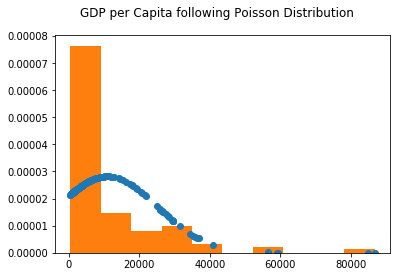

In [20]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
predefined_data = pd.read_csv("nations.csv")
fit = stats.norm.pdf(predefined_data_2000['gdp_percap'].tolist(), np.mean(predefined_data_2000['gdp_percap'].tolist()), np.std(predefined_data_2000['gdp_percap'].tolist()))

plt.plot(predefined_data_2000['gdp_percap'].tolist(),fit,'o')

plt.hist(predefined_data_2000['gdp_percap'].tolist(),normed=True) 
plt.suptitle("GDP per Capita following Poisson Distribution")
plt.show()

We can identify from the plot above that the distribution is Poisson.

"The Poisson distribution is used to describe the distribution of rare events in a large population."
Frank H Stephenson, 2016 (reference Poisson Distribution).

Hoffman (2015) suggests that the Poisson distribution approximates the binomial distribution closely when n is very large and p is very small.

Marchini (2008) suggests that the Poisson distribution is a discrete probability distribution for the counts of events that occur randomly in a given interval of time (or space).

### Life Expectancy Histogram

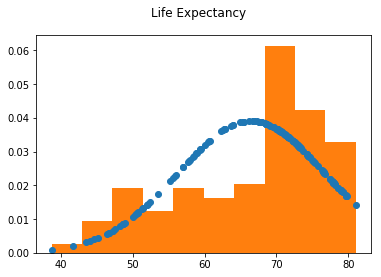

In [23]:
fit = stats.norm.pdf(predefined_data_2000['life_expect'].tolist(), np.mean(predefined_data_2000['life_expect'].tolist()), np.std(predefined_data_2000['life_expect'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['life_expect'].tolist(),fit,'o')

# Draw histogram of the data
plt.hist(predefined_data_2000['life_expect'].tolist(),normed=True)      

# Name the plot Life Expectancy as using data from this variable to plot
plt.suptitle("Life Expectancy")
plt.show()

### Population Histogram

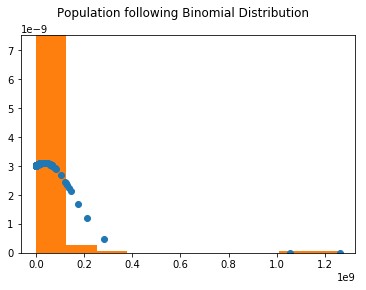

In [24]:
# predefined_data_2000['population']=predefined_data_2000.loc[:,'population'] * 1000
fit = stats.norm.pdf(predefined_data_2000['population'].tolist(), np.mean(predefined_data_2000['population'].tolist()), np.std(predefined_data_2000['population'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['population'].tolist(),fit,'o')

plt.hist(predefined_data_2000['population'].tolist(),normed=True)      
plt.suptitle("Population following Binomial Distribution")
plt.show()

### Binomial Distribution
The binomial distribution describes the behavior of a count variable X if the following conditions apply:

1: The number of observations n is fixed.
2: Each observation is independent.
3: Each observation represents one of two outcomes ("success" or "failure").
4: The probability of "success" p is the same for each outcome.
Reference: Binomial Distribution

### Birth Rate Histogram

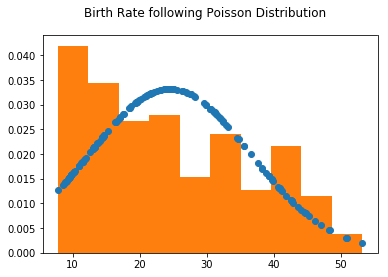

In [25]:
# predefined_data_2000['population']=predefined_data_2000.loc[:,'population'] * 1000
fit = stats.norm.pdf(predefined_data_2000['birth_rate'].tolist(), np.mean(predefined_data_2000['birth_rate'].tolist()), np.std(predefined_data_2000['birth_rate'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['birth_rate'].tolist(),fit,'o')

plt.hist(predefined_data_2000['birth_rate'].tolist(),normed=True)      #use this to draw histogram of your data
plt.suptitle("Birth Rate following Poisson Distribution")
plt.show()

### Neo Natal Mortality Rate Histogram

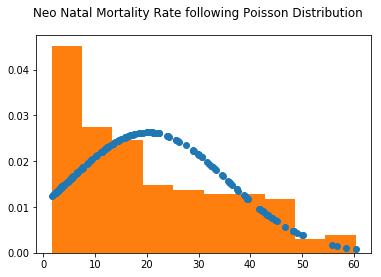

In [27]:
# predefined_data_2000['population']=predefined_data_2000.loc[:,'population'] * 1000
fit = stats.norm.pdf(predefined_data_2000['neonat_mortal_rate'].tolist(), np.mean(predefined_data_2000['neonat_mortal_rate'].tolist()), np.std(predefined_data_2000['neonat_mortal_rate'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['neonat_mortal_rate'].tolist(),fit,'o')

plt.hist(predefined_data_2000['neonat_mortal_rate'].tolist(),normed=True)      
plt.suptitle("Neo Natal Mortality Rate following Poisson Distribution")
plt.show()

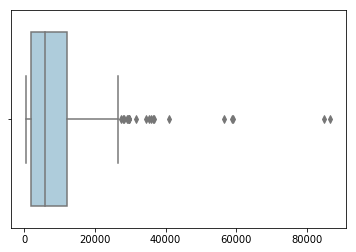

In [68]:
import seaborn as sns
fit = stats.norm.pdf(predefined_data_2000['gdp_percap'].tolist(), np.mean(predefined_data_2000['gdp_percap'].tolist()), np.std(predefined_data_2000['gdp_percap'].tolist()))

sns.boxplot(predefined_data_2000['gdp_percap'].tolist())

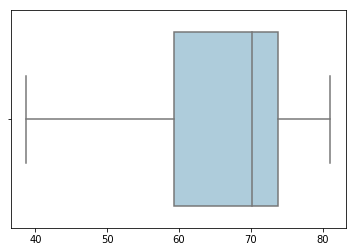

In [64]:
import seaborn as sns
fit = stats.norm.pdf(predefined_data_2000['life_expect'].tolist(), np.mean(predefined_data_2000['life_expect'].tolist()), np.std(predefined_data_2000['life_expect'].tolist()))

life_expectsns.boxplot(predefined_data_2000['life_expect'].tolist())

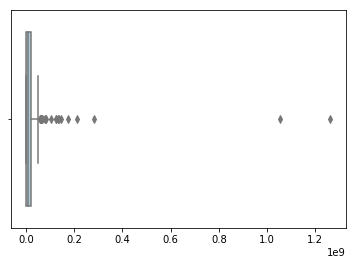

In [70]:
import seaborn as sns
fit = stats.norm.pdf(predefined_data_2000['population'].tolist(), np.mean(predefined_data_2000['population'].tolist()), np.std(predefined_data_2000['population'].tolist()))

sns.boxplot(predefined_data_2000['population'].tolist())

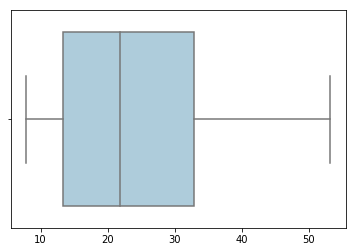

In [65]:
import seaborn as sns
fit = stats.norm.pdf(predefined_data_2000['birth_rate'].tolist(), np.mean(predefined_data_2000['birth_rate'].tolist()), np.std(predefined_data_2000['birth_rate'].tolist()))

birth_ratesns.boxplot(predefined_data_2000['birth_rate'].tolist())

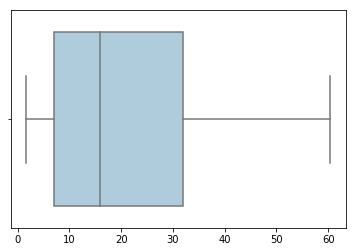

In [67]:
import seaborn as sns
fit = stats.norm.pdf(predefined_data_2000['neonat_mortal_rate'].tolist(), np.mean(predefined_data_2000['neonat_mortal_rate'].tolist()), np.std(predefined_data_2000['neonat_mortal_rate'].tolist()))

sns.boxplot(predefined_data_2000['neonat_mortal_rate'].tolist())

#### Statistics and p-value

In [30]:
print("GDP per capita", stats.mstats.normaltest(predefined_data_2000['gdp_percap'].tolist(), axis=0))
print("Life Expectancy", stats.mstats.normaltest(predefined_data_2000['life_expect'].tolist(), axis=0))
print("Population", stats.mstats.normaltest(predefined_data_2000['population'].tolist(), axis=0))
print("Birth Rate", stats.mstats.normaltest(predefined_data_2000['birth_rate'].tolist(), axis=0))
print("Neo Natal Mortality Rate", stats.mstats.normaltest(predefined_data_2000['neonat_mortal_rate'].tolist(), axis=0))

GDP per capita NormaltestResult(statistic=119.45388172309397, pvalue=1.1505862053680181e-26)
Life Expectancy NormaltestResult(statistic=17.19234082817446, pvalue=0.0001848121943692328)
Population NormaltestResult(statistic=291.24306353269634, pvalue=5.719687581440444e-64)
Birth Rate NormaltestResult(statistic=28.945943611317528, pvalue=5.181651590406356e-07)
Neo Natal Mortality Rate NormaltestResult(statistic=17.60789866527101, pvalue=0.00015013895400587632)


### Plotting the attributes against each other to highlight their relationships.

#### Observation 1

The relationship between GDP and Life expectancy is following a positive exponential distribution.

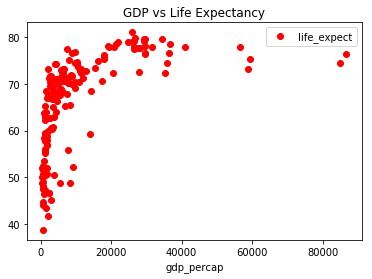

In [19]:
predefined_data_2000.plot(x='gdp_percap', y='life_expect', style='ro', title="GDP vs Life Expectancy")

#### Observation 2

The relationship between GDP and Population is following a uniform distribution with a few outliers. However we can also say that the increase in gdp is related to a lower population.

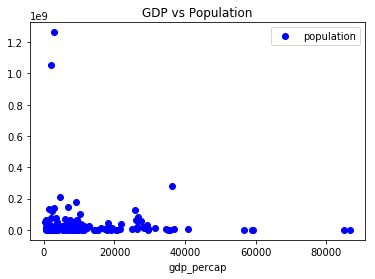

In [20]:
predefined_data_2000.plot(x='gdp_percap', y='population', style='bo', title="GDP vs Population")

#### Observation 3

The relationship between GDP and Birth Rate is following a negative exponential distribution.

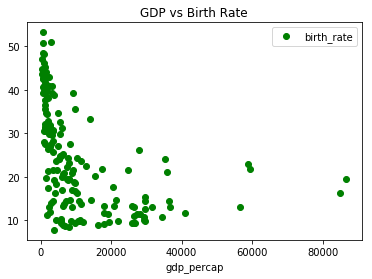

In [21]:
predefined_data_2000.plot(x='gdp_percap', y='birth_rate', style='go', title="GDP vs Birth Rate")

#### Observation 4
The relationship between GDP and Neo natal mortality rate is following a negative exponential distribution.

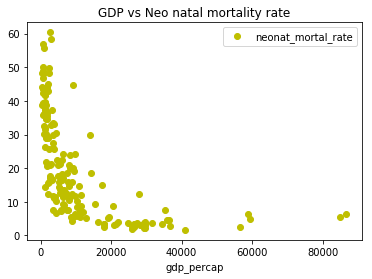

In [22]:
predefined_data_2000.plot(x='gdp_percap', y='neonat_mortal_rate', style='yo', title="GDP vs Neo natal mortality rate")

#### Observation 5

The relationship between Life Expectancy and Population is following a uniform distribution with a few outliers. We can also identify that increase in life expectancy is related to lower population.

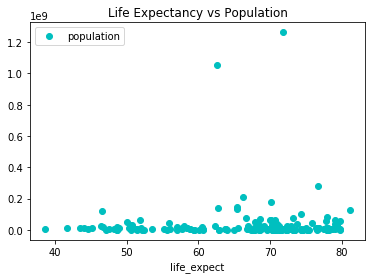

In [23]:
predefined_data_2000.plot(x='life_expect', y='population', style='co', title="Life Expectancy vs Population")

#### Observation 6

The relationship between Life expectancy and birth_rate is following a Poisson distribution with a few outliers. They are indirectly proportional.

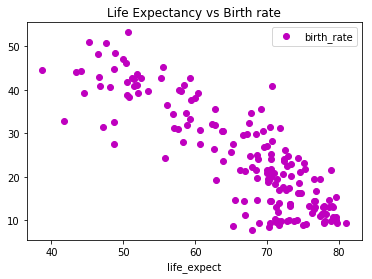

In [24]:
predefined_data_2000.plot(x='life_expect', y='birth_rate', style='mo', title="Life Expectancy vs Birth rate")

#### Observation 7
The relationship between Life expectancy and neo natal mortal rate is indirectly proportional to each other.

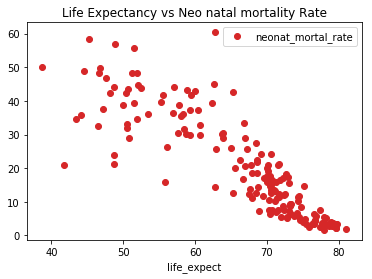

In [25]:
predefined_data_2000.plot(x='life_expect', y='neonat_mortal_rate', style='C3o', title="Life Expectancy vs Neo natal mortality Rate")

#### Observation 8

The relationship between Population and neo natal mortal rate is following a uniform distribution with outliers. 

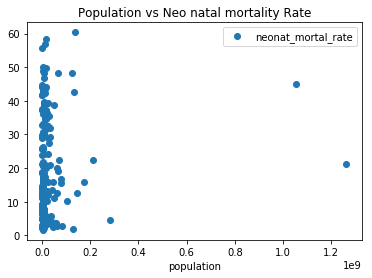

In [26]:
predefined_data_2000.plot(x='population', y='neonat_mortal_rate', style='o', title="Population vs Neo natal mortality Rate")

#### Observation 9
The relationship between Population and birth rate is following a uniform distribution with outliers.

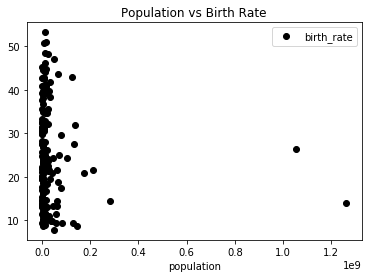

In [27]:
predefined_data_2000.plot(x='population', y='birth_rate', style='ko', title="Population vs Birth Rate")

#### Observation 10

The relationship between birth_rate and neo natal mortal rate is directly proportional to each other. This can be observed from the increasing slope of the scatter plot.

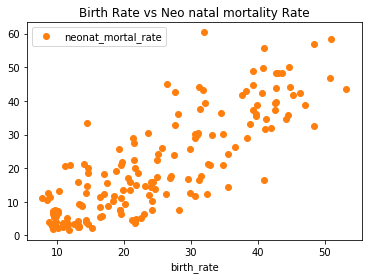

In [28]:
predefined_data_2000.plot(x='birth_rate', y='neonat_mortal_rate', style='C1o', title="Birth Rate vs Neo natal mortality Rate")

## 2.3 Simulate a data set matching their properties as closely as possible.

Take the 5 variables and use the np random function to simulate the data for 100 data points. np.random.exponential allows us to draw samples from an exponential distribution.  


In [82]:
# As per the project guidelines analysing a data set of 100 data points.
gdp_per_cap_syn = np.random.exponential(400, 100)
life_expect_syn = np.random.exponential(39, 100)
population_syn = np.random.exponential(20000, 100)
birth_rate_syn = np.random.exponential(7, 100)
neonatal_mortal_syn = np.random.exponential(2, 100)

### Synthesized Data for GDP per Capita

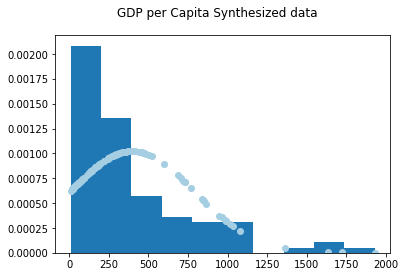

In [83]:
fit = stats.norm.pdf(gdp_per_cap_syn, np.mean(gdp_per_cap_syn), np.std(gdp_per_cap_syn))

plt.plot(gdp_per_cap_syn,fit,'o')

plt.hist(gdp_per_cap_syn,normed=True)
plt.suptitle("GDP per Capita Synthesized data")
plt.show() 

### Synthesized Data for Life Expectancy

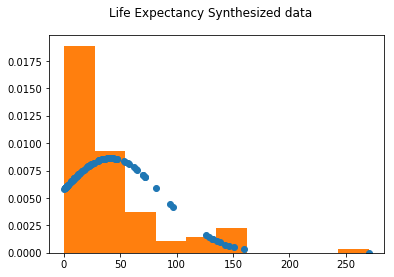

In [34]:
fit = stats.norm.pdf(life_expect_syn, np.mean(life_expect_syn), np.std(life_expect_syn))  

plt.plot(life_expect_syn,fit,'o')

plt.hist(life_expect_syn,normed=True)      
plt.suptitle("Life Expectancy Synthesized data")
plt.show() 

### Synthesized Data for Population

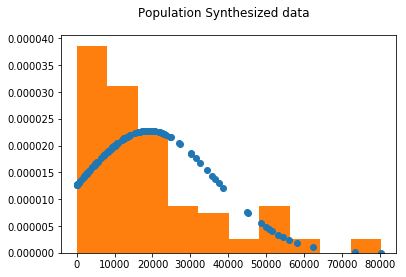

In [36]:
fit = stats.norm.pdf(population_syn, np.mean(population_syn), np.std(population_syn))  

plt.plot(population_syn,fit,'o')

plt.hist(population_syn,normed=True)
plt.suptitle("Population Synthesized data")
plt.show()

### Synthesized Data for Birth Rate

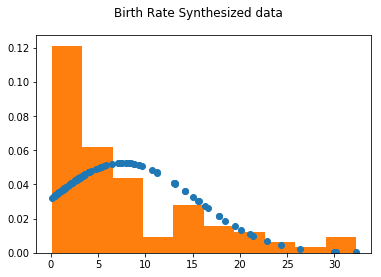

In [38]:
fit = stats.norm.pdf(birth_rate_syn, np.mean(birth_rate_syn), np.std(birth_rate_syn))

plt.plot(birth_rate_syn,fit,'o')

plt.hist(birth_rate_syn,normed=True)
plt.suptitle("Birth Rate Synthesized data")
plt.show()

### Synthesized Data for Neo Natal Mortality Rate 

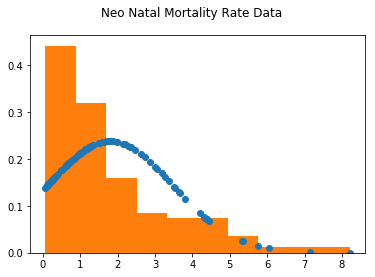

In [44]:
fit = stats.norm.pdf(neonatal_mortal_syn, np.mean(neonatal_mortal_syn), np.std(neonatal_mortal_syn))  #this is a fitting indeed

plt.plot(neonatal_mortal_syn,fit,'o')

plt.hist(neonatal_mortal_syn,normed=True)      #use this to draw histogram of your data
plt.suptitle("Neo Natal Mortality Rate Data")
plt.show()

### New Synthesized DataFrame

In [39]:
New_Synthesised_Data = pd.DataFrame({'GDP_Per_Capita_Synthesised': gdp_per_cap_syn, 'Life_Expectancy_Synthesised': life_expect_syn, 'Population_Synthesised': population_syn, 'Birth_Rate_Synthesised': birth_rate_syn, 'Neonatal_mortal_rate_Synthesised': neonatal_mortal_syn})
New_Synthesised_Data

,Birth_Rate_Synthesised,GDP_Per_Capita_Synthesised,Life_Expectancy_Synthesised,Neonatal_mortal_rate_Synthesised,Population_Synthesised
0,5.333839,19.150763,61.887098,0.143755,4937.498588
1,19.483404,238.389555,128.893388,4.375091,11878.814669
2,15.621396,173.911844,47.343086,4.339346,8710.502930
3,4.066087,1123.924320,0.705461,2.345859,12607.679470
4,1.632804,170.128858,2.540831,3.643220,13759.256257
5,13.004009,457.174597,31.176833,0.270377,62.202871
6,8.305099,655.212299,13.436800,0.150409,10811.923145
7,15.538478,215.725829,36.937825,1.822956,23170.756897
8,4.750633,993.997336,10.621041,1.241010,10068.463242
9,1.477990,58.839351,46.993918,1.039874,19180.693233


### 3.0 Summary

For this project I chose to review data of the world econometric factors in order to analyse the associations between the world GDP per capita, life expectancy, population, birth rate and neo natal mortality rate. This project is based on a pre existing dataset taken from the world databank indicators portal. The datset is called nations.csv. 

Five variables have been taken into consideration:
- gdp_percap
- life_expect
- population
- birth_rate
- Neo natal Mortal Rate.

To begin I analysed the existing dataset to understand the different attributes, their relations with each other and the distribution they follow. Using these observations I formed an algorithym for a manual data simulation.

I read the csv file to anaylse and then decided to focus on the year 2000 for my review. Section 2.2 allowed me to investigate the types of variables involved, their distributions and relationships with each other. To begin I extracted any data I would not be using (na & unused columns). I then defined the year I would anaylse for this project as 2000. I chose the 5 variables listed above for this project. I used the describe function to output a statistical analysis of the data for the year 2000. I used the dtypes function to display the type of data in each column.I anaylysed the distribution of my data using histograms. This allows me to clearly define the type of distribution e.g. Poisson and Binomial. 

Once I had reviewed the chosen dataset I then used this data to simulate data based on the 5 chosen variables over 100 data points. I used the np.random.exponential to gather this data and the output was displayed in histograms. Finally I displayed the simulated data in a dataframe with 100 data points.

### 4.0 References
- 1.0 Data nations.csv http://www.worldbank.org/
- Research https://ermlab.com/en/blog/data-science/pandas-seaborn-world-bank-gdp-analysis/
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- 2.3 https://www.programcreek.com/python/example/55595/numpy.random.exponential
- 2.3 https://stackoverflow.com/questions/15091982/manipulating-the-numpy-random-exponential-distribution-in-python
- Poisson distribution: Frank H Stephenson, Calculations for Molecular Biology and Biotechnology (Third Edition), 2016. Link: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/poisson-distribution
- Poisson distribution: Jonathan Marchini (2008). Link: http://www.stats.ox.ac.uk/~marchini/teaching/L5/L5.notes.pdf
- Binomial Distribution: http://www.stat.yale.edu/Courses/1997-98/101/binom.htm